**Import Modul**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # bagi data
from sklearn.preprocessing import MinMaxScaler # normalisasi
from sklearn.svm import SVC # model
import seaborn as sns # visualisasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # kinerja matriks klasifikasi

**Ambil Data**

In [35]:
df = pd.read_excel('schizo_symptons_cleaned_MinMax.xlsx') # dataset di tampung dalam variabel df

In [36]:
print(df.describe()) # menampilkan ringkasan statistik deskriptif dari kolom-kolom numerik dalam DataFrame df.

               Age       Gender  Marital_Status      Fatigue      Slowing  \
count  5000.000000  5000.000000     5000.000000  5000.000000  5000.000000   
mean      0.495835     0.498000        1.483000     0.504910     0.500735   
std       0.239447     0.500046        1.130472     0.243461     0.243069   
min       0.000000     0.000000        0.000000     0.000000     0.000000   
25%       0.300000     0.000000        0.000000     0.299428     0.297777   
50%       0.500000     0.000000        1.000000     0.504910     0.500735   
75%       0.700000     1.000000        3.000000     0.709179     0.698237   
max       1.000000     1.000000        3.000000     1.000000     1.000000   

              Pain      Hygiene     Movement  Schizophrenia  
count  5000.000000  5000.000000  5000.000000    5000.000000  
mean      0.502095     0.502877     0.500111       0.766200  
std       0.242588     0.249666     0.246022       1.150218  
min       0.000000     0.000000     0.000000       0.00000

In [37]:
print("informasi dataset :")
print(df.info()) # print informasi dataset

informasi dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   float64
 1   Gender          5000 non-null   int64  
 2   Marital_Status  5000 non-null   int64  
 3   Fatigue         5000 non-null   float64
 4   Slowing         5000 non-null   float64
 5   Pain            5000 non-null   float64
 6   Hygiene         5000 non-null   float64
 7   Movement        5000 non-null   float64
 8   Schizophrenia   5000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 351.7 KB
None


**Preprocessing**

In [ ]:
df.drop('Name', axis=1, inplace=True) # menghapus kolom nama dari dataset

In [38]:
print("\njumlah data per baris :")
print(df.count(axis=1)) # menghitung jumlah data yang tidak kosong di setiap kolom.
print("\njumlah data per kolom :")
print(df.count(axis=0)) # menghitung jumlah kolom yang tidak kosong untuk setiap baris.


jumlah data per baris :
0       9
1       9
2       9
3       9
4       9
       ..
4995    9
4996    9
4997    9
4998    9
4999    9
Length: 5000, dtype: int64

jumlah data per kolom :
Age               5000
Gender            5000
Marital_Status    5000
Fatigue           5000
Slowing           5000
Pain              5000
Hygiene           5000
Movement          5000
Schizophrenia     5000
dtype: int64


In [39]:
# cek kolom yg mengandung kata diagnosis, label atau schizo
possible_targets = [col for col in df.columns
                    if 'diagnosis' in col.lower()
                    or 'label' in col.lower()
                    or 'schizo' in col.lower()]

# jika kolom mengandung kata diagnosis atau label, maka dijadikan target atau -> masuk dalam list possible_targets
feature_target = possible_targets[0] if possible_targets else None # jika ada maka diambil indeks 0, jika tidak ada maka None

# jika kolom tidak mengandung diagnosis atau label maka masuk ke dalam list feature_variables
feature_variables = [col for col in df.columns
                     if col != feature_target]

print("\nFitur Target:", feature_target)
print("Fitur Variabel Bebas:", feature_variables)


Fitur Target: Schizophrenia
Fitur Variabel Bebas: ['Age', 'Gender', 'Marital_Status', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']


In [40]:
print("jumlah data null :")
print(df.isnull().sum()) # menampilkan jumlah nilai yang kosong (NaN/null) di setiap kolom dalam DataFrame df.

jumlah data null :
Age               0
Gender            0
Marital_Status    0
Fatigue           0
Slowing           0
Pain              0
Hygiene           0
Movement          0
Schizophrenia     0
dtype: int64


In [41]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True) # mengisi (fill) semua nilai kosong (NaN) di kolom numerik dengan rata-rata (mean) dari kolom masing-masing.
print(df.isnull().sum()) # menampilkan jumlah nilai kosong (NaN/missing value) di setiap kolom dalam DataFrame df.

Age               0
Gender            0
Marital_Status    0
Fatigue           0
Slowing           0
Pain              0
Hygiene           0
Movement          0
Schizophrenia     0
dtype: int64


In [42]:
# cek data duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


In [43]:
from sklearn.preprocessing import LabelEncoder
# ubah kolom categorical menjadi numerik

le_gender = LabelEncoder() # mengubah nilai kategori (string) menjadi angka.
# Mengubah nilai dalam kolom Gender dari string menjadi angka menggunakan encoder yang dibuat
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

le_marital = LabelEncoder()
df['Marital_Status'] = le_marital.fit_transform(df['Marital_Status'])

le_target = LabelEncoder()
df['Schizophrenia'] = le_target.fit_transform(df['Schizophrenia'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   float64
 1   Gender          5000 non-null   int64  
 2   Marital_Status  5000 non-null   int64  
 3   Fatigue         5000 non-null   float64
 4   Slowing         5000 non-null   float64
 5   Pain            5000 non-null   float64
 6   Hygiene         5000 non-null   float64
 7   Movement        5000 non-null   float64
 8   Schizophrenia   5000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 351.7 KB
None


In [44]:
# Ambil hanya kolom numerik dari DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Hitung kuartil dan IQR
q1 = np.quantile(numeric_df, 0.25, axis=0) # menghitung kuartil pertama (25%)
q2 = np.quantile(numeric_df, 0.50, axis=0)
q3 = np.quantile(numeric_df, 0.75, axis=0)
iqr = q3 - q1

# Hitung batas atas dan bawah
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Hitung jumlah outlier
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)
print("Jumlah nilai outlier per kolom:")
print(outliers.sum()) # tampilkan outlier

Jumlah nilai outlier per kolom:
Age                 0
Gender              0
Marital_Status      0
Fatigue             0
Slowing             0
Pain                0
Hygiene             0
Movement            0
Schizophrenia     925
dtype: int64


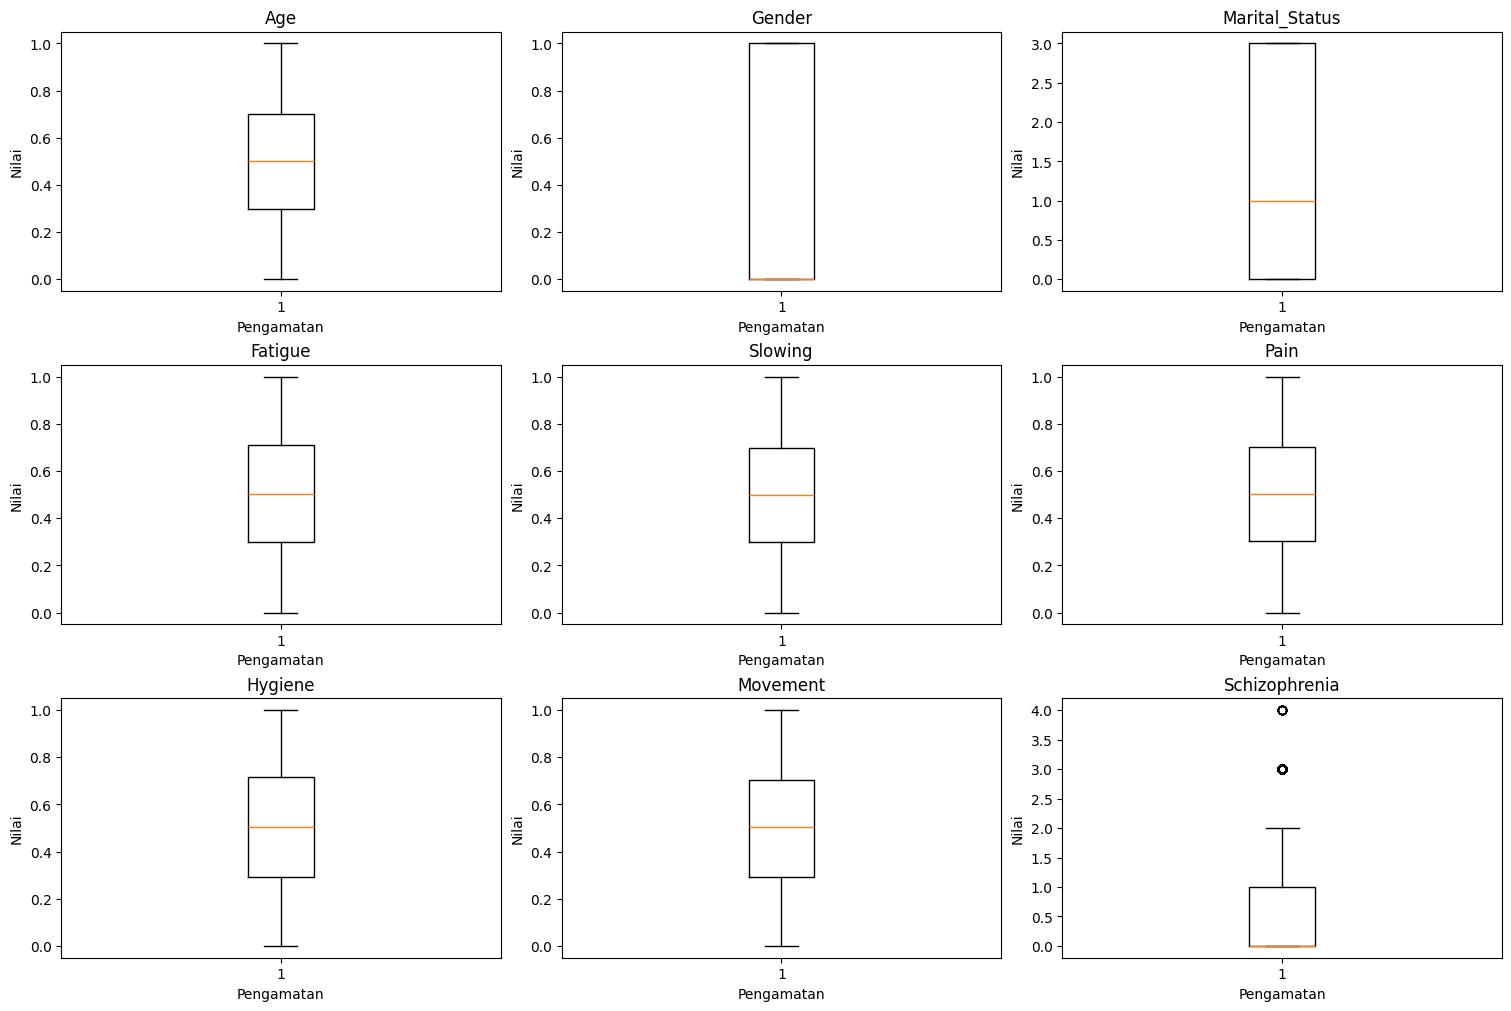

In [45]:
# Daftar kolom yang ingin ditampilkan dalam subplot
columns = ['Age', 'Gender', 'Marital_Status', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement', 'Schizophrenia']

# Buat subplot dinamis sesuai jumlah kolom
fig, axes = plt.subplots(3, 3, figsize=(15, 10), layout='constrained')
axes = axes.flatten()

# Jika hanya satu kolom, axes bukan iterable, jadi buat jadi list
if len(columns) == 1:
    axes = [axes]

# Loop untuk setiap kolom dan subplot
for i, col in enumerate(columns):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    axes[i].set_xlabel('Pengamatan')
    axes[i].set_ylabel('Nilai')

plt.show()

In [46]:
# mengganti nilai outlier dengan rata rata
no_outliers = []
mean = np.mean(df["Pain"])
for x in df["Pain"]:
    if x not in outliers:
        no_outliers.append(x)
    else:
        no_outliers.append(mean)

print("jumlah data tanpa outlier :")
print(len(no_outliers))

jumlah data tanpa outlier :
5000


**Split Data Latih dan Uji**

In [47]:
# 1. Pisahkan fitur (X) dan target (y)
feature_target = 'Schizophrenia'
X = df.drop(columns=[feature_target])
y = df[feature_target]

mengunakan teknik Z-Score Standardization

In [48]:
# 2. Standarisasi fitur agar skala seragam
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# 3. Bagi data menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

**Latih dan Prediksi Model**

In [58]:
# 4. Buat model SVM dengan kernel RBF
SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')

SVC(class_weight='balanced')

In [59]:
# 5. Latih model dengan data latih
svm_model.fit(X_train, y_train)

SVC()

In [60]:
# 6. Prediksi data uji
y_pred = svm_model.predict(X_test)

=== Confusion Matrix ===
[[602  14   0   8   0]
 [ 12 154   0   0   0]
 [  0   0   0  10   0]
 [ 20   0   0 176   0]
 [  0   4   0   0   0]]


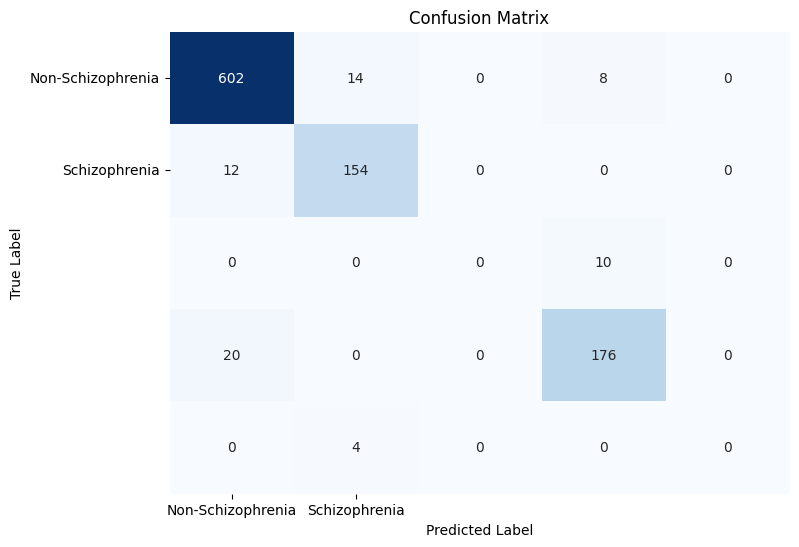


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       624
           1       0.90      0.93      0.91       166
           2       0.00      0.00      0.00        10
           3       0.91      0.90      0.90       196
           4       0.00      0.00      0.00         4

    accuracy                           0.93      1000
   macro avg       0.55      0.56      0.55      1000
weighted avg       0.92      0.93      0.93      1000


=== Accuracy Score ===
0.932

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       624
           1       0.90      0.93      0.91       166
           2       0.00      0.00      0.00        10
           3       0.91      0.90      0.90       196
           4       0.00      0.00      0.00         4

    accuracy                           0.93      1000
   macro avg       0.55      0.56      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [61]:
# 7. Evaluasi performa model
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define class names for the target variable
# Assuming 'Schizophrenia' is encoded as 0 and 1. Adjust if you have more classes.
class_names = ['Non-Schizophrenia', 'Schizophrenia']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # class_names: list of label names
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))

Tahap Impelementasi Model SVM